<a href="https://colab.research.google.com/github/NicolLoaiza1/SIS420-Laboratorio-07/blob/main/Laboratorio_07_Loaiza_Alvarez_Nicol_Noelia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
# Loaiza Alvarez Nicol Noelia

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

In [189]:
data = pd.read_csv(('/content/drive/MyDrive/SIS 420 Dataset/Dataset.csv'),delimiter=',')
data = np.array(data)
X = data[:, 0]
y = data[:, 21]
m = y.size 

print(X)
print('-'*45)
print(y)
print('-'*45)
print(m)


[120. 132. 133. ... 140. 140. 142.]
---------------------------------------------
[2. 1. 1. ... 2. 2. 1.]
---------------------------------------------
2126


In [190]:
def Graficar(X, y):
    fig = pyplot.figure() 
    pyplot.plot(X, y, 'g*', ms=10)
    pyplot.ylabel('Salud fetal')
    pyplot.xlabel('Valor de referencia')


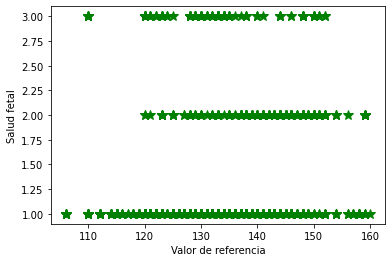

In [191]:
Graficar(X, y)

In [192]:
X = np.stack([np.ones(m), X], axis=1)

In [193]:
print(X)

[[  1. 120.]
 [  1. 132.]
 [  1. 133.]
 ...
 [  1. 140.]
 [  1. 140.]
 [  1. 142.]]


In [194]:
def computeCost(X, y, theta):
    m = X.size 
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [195]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)

J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)


Con theta = [0, 0] 
 Costo calculado = 0.52
Con theta = [-1, 2]
 Costo calculado = 17560.07


In [196]:
def gradientDescent(X, y, theta, alpha, num_iters):  
    m = y.shape[0]
    theta = theta.copy()    
    J_history = []    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [197]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 1000
alpha = 0.000001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print(J_history[-1])
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))


0.09225701144374593
Theta encontrada por descenso gradiente: 0.0001, 0.0098


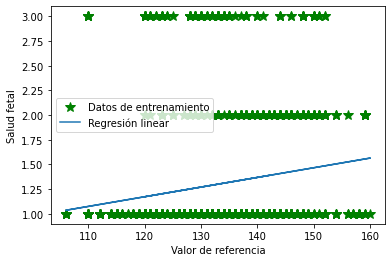

In [198]:
# grafica la linea de ajuste
Graficar(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

In [199]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 5], theta)
print('La clasificación de salud fetal de 5 personas , se predice un precio  de {:.2f}\n'.format(predict1*1000))

predict2 = np.dot([1, 17], theta)
print('La clasificación de salud fetal de 17 personas , se predice un precio  de {:.2f}\n'.format(predict2*1000))

La clasificación de salud fetal de 5 personas , se predice un precio  de 48.98

La clasificación de salud fetal de 17 personas , se predice un precio  de 166.35

